Chapter 8
# 平面随机行走
Book_6《数据有道》 | 鸢尾花书：从加减乘除到机器学习

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.collections as mcoll

In [2]:
def colorline(
        x, y, z=None, cmap='copper', norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    # to check for numerical input -- this is a hack
    if not hasattr(z, "__iter__"):
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    ax = plt.gca()
    ax.add_collection(lc)

    return lc

In [3]:
def make_segments(x, y):

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

In [4]:
N_steps = 1000; 
# number of steps

delta_x = np.random.normal(loc=0.0, scale=1.0, size=(N_steps,1))
delta_y = np.random.normal(loc=0.0, scale=1.0, size=(N_steps,1))
 
disp_x = np.cumsum(delta_x, axis = 0); 
disp_y = np.cumsum(delta_y, axis = 0); 

disp_x = np.vstack(([0],disp_x))
disp_y = np.vstack(([0],disp_y))

(-10.213069494101758,
 15.239355643937714,
 -33.44735509490563,
 14.400648926710474)

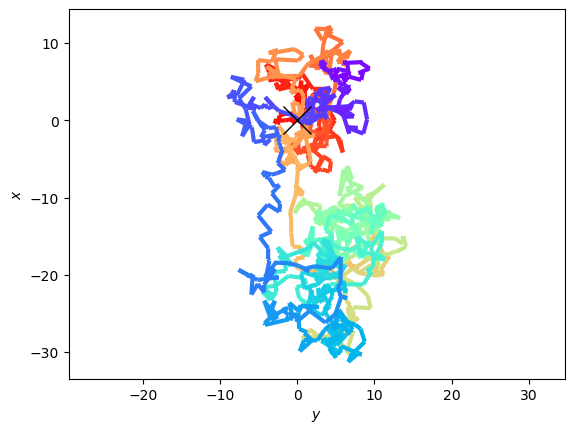

In [5]:
fig, ax = plt.subplots()

# plt.plot(disp_x,disp_y); 
lc = colorline(disp_x, disp_y, cmap='rainbow_r')
plt.plot(0,0,'kx', markersize = 20)
plt.ylabel('$x$'); 
plt.xlabel('$y$'); 
plt.axis('equal')